# Order Delivery Time Prediction

## Objectives
The objective of this assignment is to build a regression model that predicts the delivery time for orders placed through Porter. The model will use various features such as the items ordered, the restaurant location, the order protocol, and the availability of delivery partners.

The key goals are:
- Predict the delivery time for an order based on multiple input features
- Improve delivery time predictions to optimiae operational efficiency
- Understand the key factors influencing delivery time to enhance the model's accuracy

## Data Pipeline
The data pipeline for this assignment will involve the following steps:
1. **Data Loading**
2. **Data Preprocessing and Feature Engineering**
3. **Exploratory Data Analysis**
4. **Model Building**
5. **Model Inference**

## Data Understanding
The dataset contains information on orders placed through Porter, with the following columns:

| Field                     | Description                                                                                 |
|---------------------------|---------------------------------------------------------------------------------------------|
| market_id                 | Integer ID representing the market where the restaurant is located.                         |
| created_at                | Timestamp when the order was placed.                                                        |
| actual_delivery_time      | Timestamp when the order was delivered.                                                     |
| store_primary_category    | Category of the restaurant (e.g., fast food, dine-in).                                      |
| order_protocol            | Integer representing how the order was placed (e.g., via Porter, call to restaurant, etc.). |
| total_items               | Total number of items in the order.                                                         |
| subtotal                  | Final price of the order.                                                                   |
| num_distinct_items        | Number of distinct items in the order.                                                      |
| min_item_price            | Price of the cheapest item in the order.                                                    |
| max_item_price            | Price of the most expensive item in the order.                                              |
| total_onshift_dashers     | Number of delivery partners on duty when the order was placed.                              |
| total_busy_dashers        | Number of delivery partners already occupied with other orders.                             |
| total_outstanding_orders  | Number of orders pending fulfillment at the time of the order.                              |
| distance                  | Total distance from the restaurant to the customer.                                         |


## **Importing Necessary Libraries**

In [198]:
# Import essential libraries for data manipulation and analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


## **1. Loading the data**
Load 'porter_data_1.csv' as a DataFrame

In [199]:
# Importing the file porter_data_1.csv
df = pd.read_csv("porter_data_1.csv")
print(df.dtypes)

market_id                   float64
created_at                   object
actual_delivery_time         object
store_primary_category        int64
order_protocol              float64
total_items                   int64
subtotal                      int64
num_distinct_items            int64
min_item_price                int64
max_item_price                int64
total_onshift_dashers       float64
total_busy_dashers          float64
total_outstanding_orders    float64
distance                    float64
dtype: object


## **2. Data Preprocessing and Feature Engineering** <font color = red>[15 marks]</font> <br>

#### **2.1 Fixing the Datatypes**  <font color = red>[5 marks]</font> <br>
The current timestamps are in object format and need conversion to datetime format for easier handling and intended functionality

##### **2.1.1** <font color = red>[2 marks]</font> <br>
Convert date and time fields to appropriate data type

In [200]:
# Convert 'created_at' and 'actual_delivery_time' columns to datetime format

df[["created_at","actual_delivery_time"]] = df[["created_at","actual_delivery_time"]].apply(pd.to_datetime)
print(df.dtypes)

market_id                          float64
created_at                  datetime64[ns]
actual_delivery_time        datetime64[ns]
store_primary_category               int64
order_protocol                     float64
total_items                          int64
subtotal                             int64
num_distinct_items                   int64
min_item_price                       int64
max_item_price                       int64
total_onshift_dashers              float64
total_busy_dashers                 float64
total_outstanding_orders           float64
distance                           float64
dtype: object


##### **2.1.2**  <font color = red>[3 marks]</font> <br>
Convert categorical fields to appropriate data type

In [201]:
# Convert categorical features to category type
df[['market_id','store_primary_category','order_protocol']] = df[['market_id','store_primary_category','order_protocol']] .astype('category')
print(df.dtypes)

market_id                         category
created_at                  datetime64[ns]
actual_delivery_time        datetime64[ns]
store_primary_category            category
order_protocol                    category
total_items                          int64
subtotal                             int64
num_distinct_items                   int64
min_item_price                       int64
max_item_price                       int64
total_onshift_dashers              float64
total_busy_dashers                 float64
total_outstanding_orders           float64
distance                           float64
dtype: object


#### **2.2 Feature Engineering** <font color = red>[5 marks]</font> <br>
Calculate the time taken to execute the delivery as well as extract the hour and day at which the order was placed

##### **2.2.1** <font color = red>[2 marks]</font> <br>
Calculate the time taken using the features `actual_delivery_time` and `created_at`

In [202]:
# Calculate time taken in minutes
df['time_taken'] = df['actual_delivery_time']- df['created_at']

##### **2.2.2** <font color = red>[3 marks]</font> <br>
Extract the hour at which the order was placed and which day of the week it was. Drop the unnecessary columns.

In [203]:
# Extract the hour and day of week from the 'created_at' timestamp
df['hour'] = df['created_at'].dt.hour
df['week'] = df['created_at'].dt.dayofweek
# Create a categorical feature 'isWeekend'
df['isWeekend'] = df['week'].isin([5,6]).astype('category')
df.head()
df.drop(['min_item_price','max_item_price'],inplace=True,axis=1) 

In [204]:
df.head()

market_id          created_at actual_delivery_time store_primary_category  \
0       1.0 2015-02-06 22:24:17  2015-02-06 23:11:17                      4   
1       2.0 2015-02-10 21:49:25  2015-02-10 22:33:25                     46   
2       2.0 2015-02-16 00:11:35  2015-02-16 01:06:35                     36   
3       1.0 2015-02-12 03:36:46  2015-02-12 04:35:46                     38   
4       1.0 2015-01-27 02:12:36  2015-01-27 02:58:36                     38   

  order_protocol  total_items  subtotal  num_distinct_items  \
0            1.0            4      3441                   4   
1            2.0            1      1900                   1   
2            3.0            4      4771                   3   
3            1.0            1      1525                   1   
4            1.0            2      3620                   2   

   total_onshift_dashers  total_busy_dashers  total_outstanding_orders  \
0                   33.0                14.0                      21.0   
1                    1.0                 2.0                       2.0   
2                    8.0                 6.0                      18.0   
3                    5.0                 6.0                       8.0   
4                    5.0                 5.0                       7.0   

   distance      time_taken  hour  week isWeekend  
0     34.44 0 days 00:47:00    22     4     False  
1     27.60 0 days 00:44:00    21     1     False  
2     11.56 0 days 00:55:00     0     0     False  
3     31.80 0 days 00:59:00     3     3     False  
4      8.20 0 days 00:46:00     2     1     False

#### **2.3 Creating training and validation sets** <font color = red>[5 marks]</font> <br>

##### **2.3.1** <font color = red>[2 marks]</font> <br>
 Define target and input features

In [205]:
df['time_taken_minutes'] = df['time_taken'].dt.total_seconds() / 60
df[['time_taken_minutes','time_taken']].head() 

time_taken_minutes      time_taken
0                47.0 0 days 00:47:00
1                44.0 0 days 00:44:00
2                55.0 0 days 00:55:00
3                59.0 0 days 00:59:00
4                46.0 0 days 00:46:00

In [206]:
# Define target variable (y) and features (X)


y = df['time_taken_minutes']
X = df.drop(columns=['time_taken', 'actual_delivery_time','created_at','time_taken_minutes'])

##### **2.3.2** <font color = red>[3 marks]</font> <br>
 Split the data into training and test sets

In [207]:
# Split data into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,random_state=42)



## **3. Exploratory Data Analysis on Training Data** <font color = red>[20 marks]</font> <br>
1. Analyzing the correlation between variables to identify patterns and relationships
2. Identifying and addressing outliers to ensure the integrity of the analysis
3. Exploring the relationships between variables and examining the distribution of the data for better insights

#### **3.1 Feature Distributions** <font color = red> [7 marks]</font> <br>


In [208]:
# Define numerical and categorical columns for easy EDA and data manipulation
numericals = X_train.select_dtypes(include=['int64','int32','float64']).columns.to_list()
categories = X_train.select_dtypes(include=['category','object']).columns.to_list()

numericals,categories


(['total_items',
  'subtotal',
  'num_distinct_items',
  'total_onshift_dashers',
  'total_busy_dashers',
  'total_outstanding_orders',
  'distance',
  'hour',
  'week'],
 ['market_id', 'store_primary_category', 'order_protocol', 'isWeekend'])

##### **3.1.1** <font color = red>[3 marks]</font> <br>
Plot distributions for numerical columns in the training set to understand their spread and any skewness

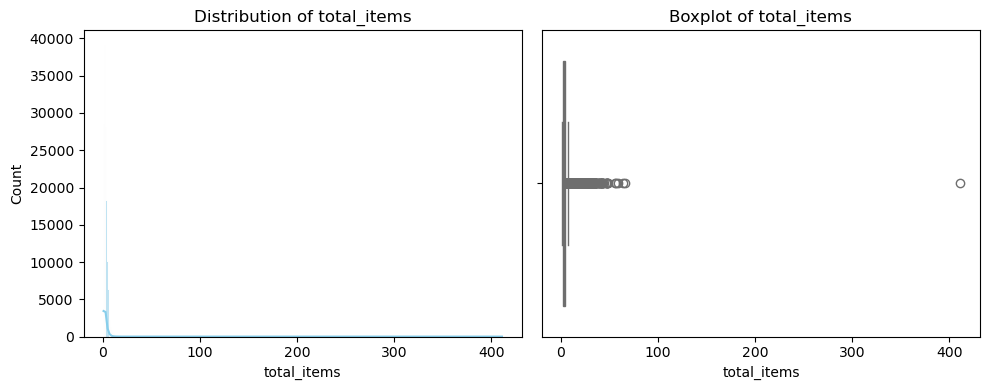

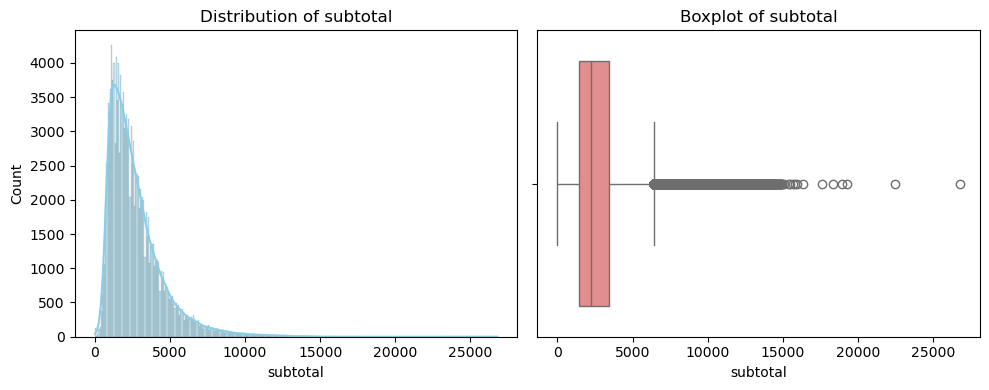

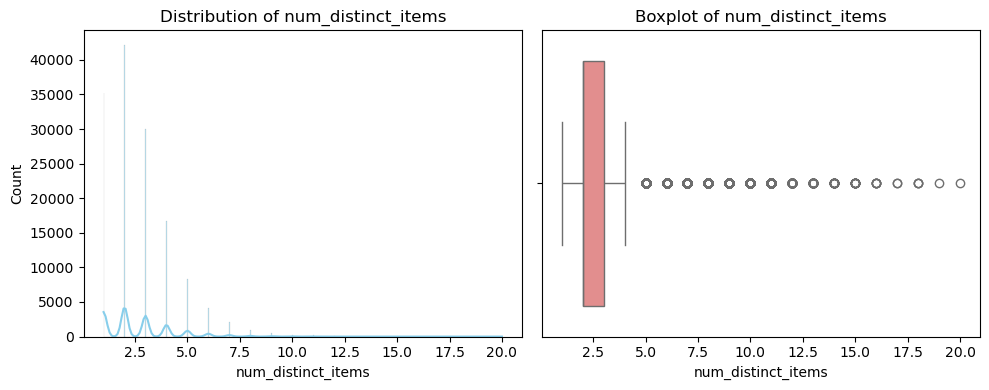

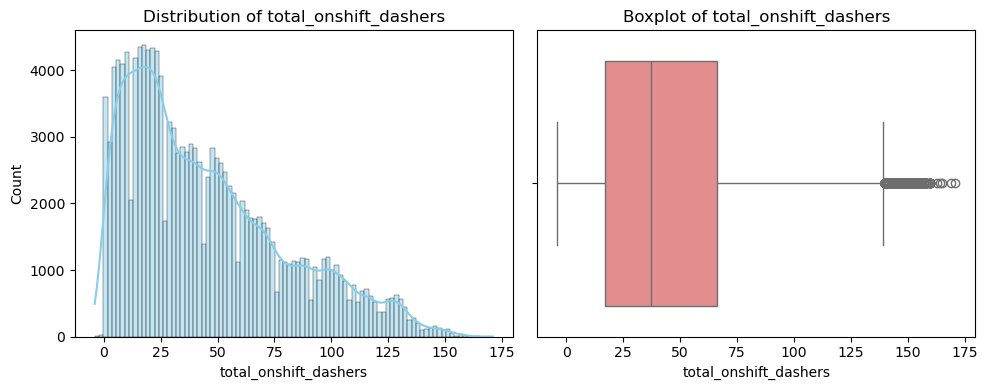

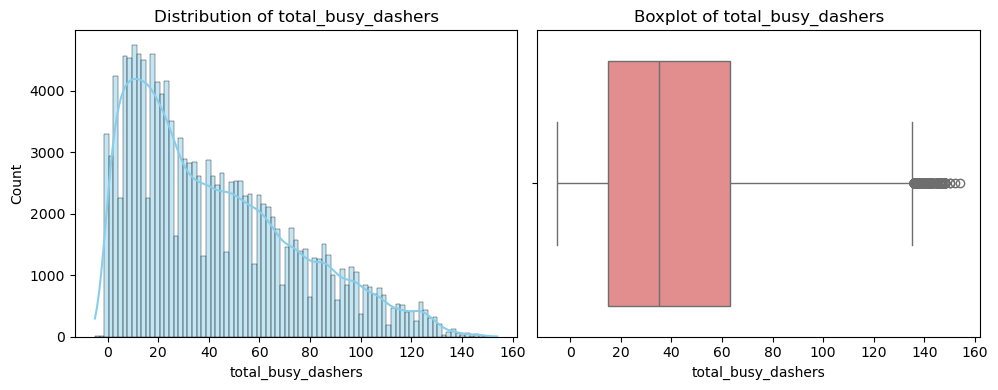

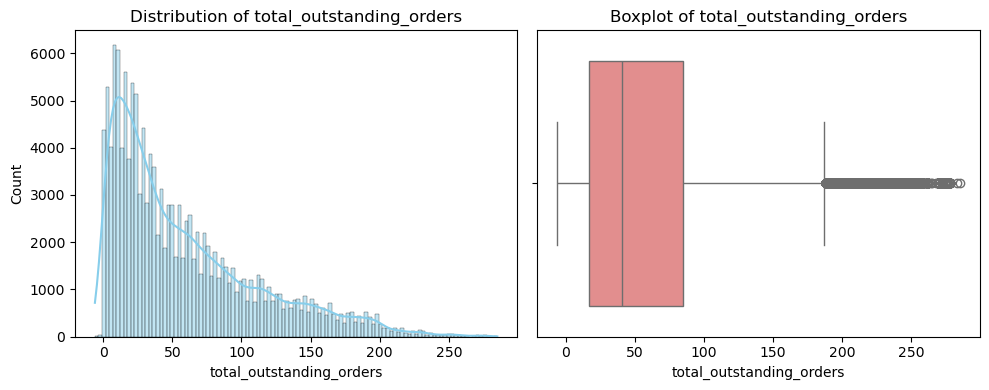

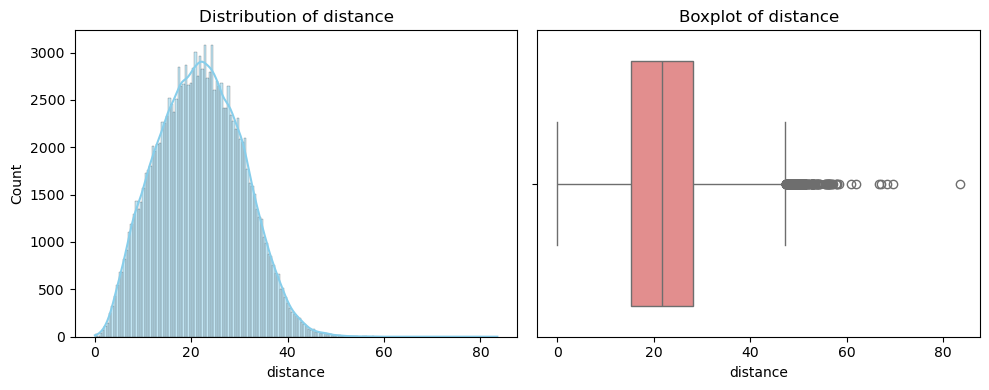

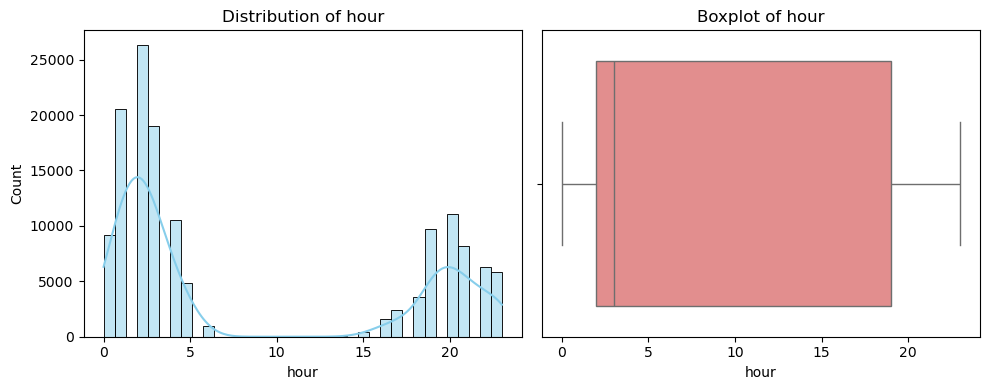

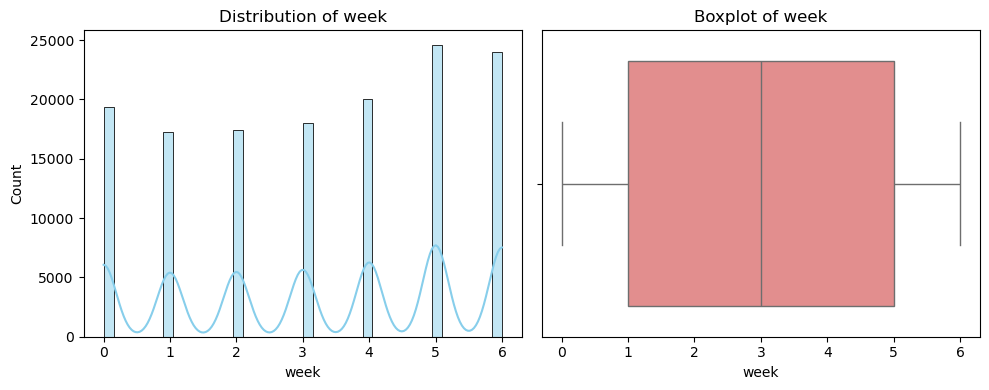

In [210]:
# Plot distributions for all numerical columns
for column in numericals:
    plt.figure(figsize=(10, 4))
    
    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(X_train[column], kde=True, color='skyblue')
    plt.title(f'Distribution of {column}')
    
    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=X_train[column], color='lightcoral')
    plt.title(f'Boxplot of {column}')
    
    plt.tight_layout()
    plt.show()



##### **3.1.2** <font color = red>[2 marks]</font> <br>
Check the distribution of categorical features

TypeError: 'str' object is not callable

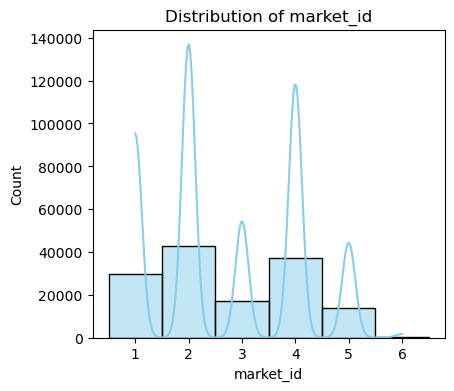

In [215]:
for column in categories:
    plt.figure(figsize=(10, 4))
    
    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(X_train[column], kde=True, color='skyblue')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    
    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=X_train[column])
    plt.title(f'Boxplot of {column}')
    plt.xlabel(column)
    
    plt.tight_layout()
    plt.show()

##### **3.1.3** <font color = red>[2 mark]</font> <br>
Visualise the distribution of the target variable to understand its spread and any skewness

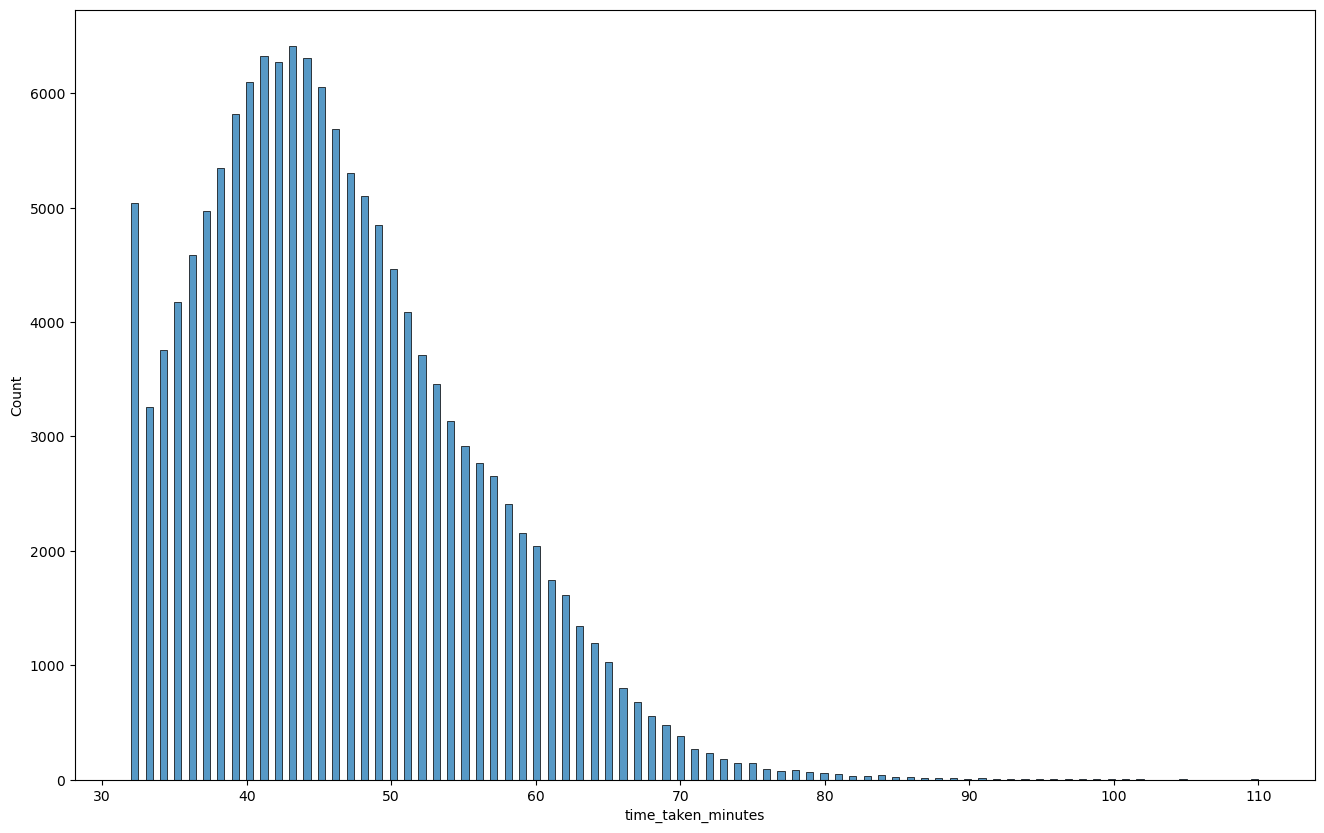

In [216]:
# Distribution of time_taken
plt.figure(figsize = (16,10))

sns.histplot(data = y_train)
plt.show()

#### **3.2 Relationships Between Features** <font color = red>[3 marks]</font> <br>

##### **3.2.1** <font color = red>[3 marks]</font> <br>
Scatter plots for important numerical and categorical features to observe how they relate to `time_taken`

In [217]:
xvars = X_train.columns.to_list()
xvars


['market_id',
 'store_primary_category',
 'order_protocol',
 'total_items',
 'subtotal',
 'num_distinct_items',
 'total_onshift_dashers',
 'total_busy_dashers',
 'total_outstanding_orders',
 'distance',
 'hour',
 'week',
 'isWeekend']

TypeError: 'str' object is not callable

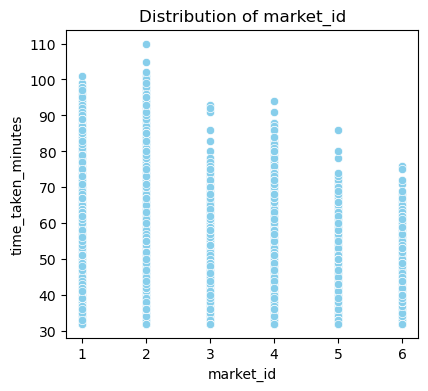

In [218]:
# Scatter plot to visualise the relationship between time_taken and other features
for column in xvars:
    plt.figure(figsize=(10, 4))
    
    # Histogram
    plt.subplot(1, 2, 1)
    sns.scatterplot(x = X_train[column],y = y_train, color='skyblue')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)


<Axes: xlabel='hour', ylabel='time_taken_minutes'>

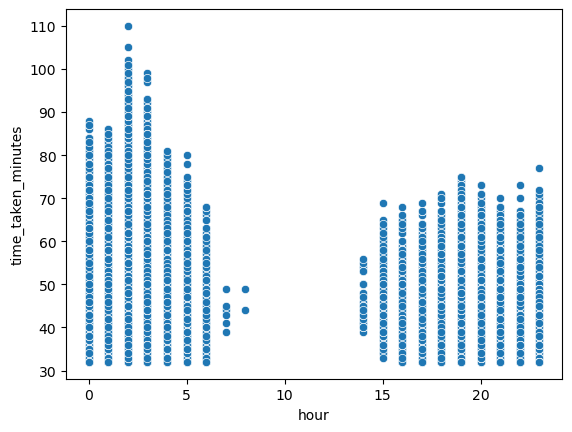

In [219]:
# Show the distribution of time_taken for different hours

sns.scatterplot(x = X_train['hour'],y=y_train)


#### **3.3 Correlation Analysis** <font color = red>[5 marks]</font> <br>
Check correlations between numerical features to identify which variables are strongly related to `time_taken`

##### **3.3.1** <font color = red>[3 marks]</font> <br>
Plot a heatmap to display correlations

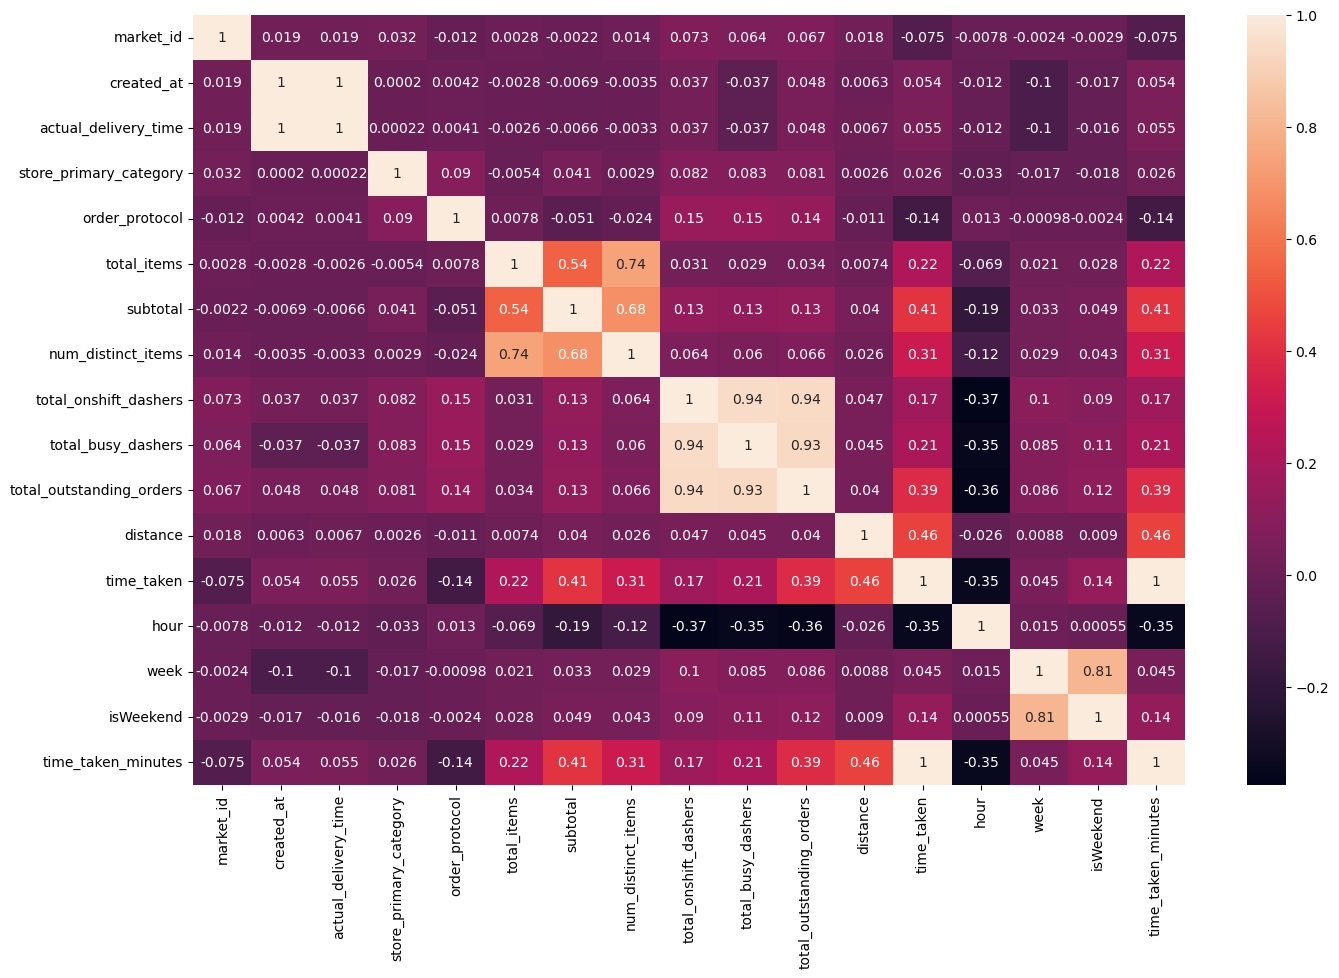

In [220]:
# Plot the heatmap of the correlation matrix
df_train,df_test = train_test_split(df,train_size = 0.8,random_state=42)
plt.figure(figsize = (16,10))
sns.heatmap(df_train.corr(),annot = True)
plt.show()

##### **3.3.2** <font color = red>[2 marks]</font> <br>
Drop the columns with weak correlations with the target variable

In [221]:
# Drop 3-5 weakly correlated columns from training dataset
#df.drop(['min_item_price','max_item_price'],inplace=True,axis=1) 
X_train.drop(['week','store_primary_category'],inplace = True,axis=1)


In [222]:
X_test.drop(['week','store_primary_category'],inplace = True,axis=1)

df_train.drop(['week','store_primary_category'],inplace = True,axis=1)
df_test.drop(['week','store_primary_category'],inplace = True,axis=1)

#### **3.4 Handling the Outliers** <font color = red>[5 marks]</font> <br>



##### **3.4.1** <font color = red>[2 marks]</font> <br>
Visualise potential outliers for the target variable and other numerical features using boxplots

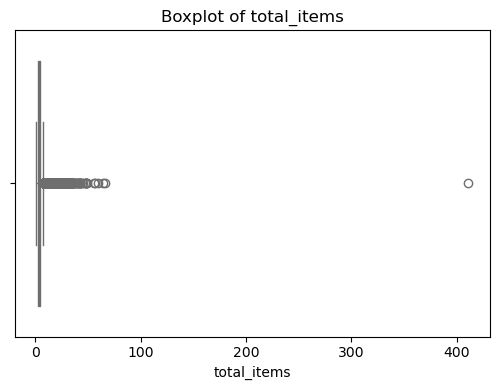

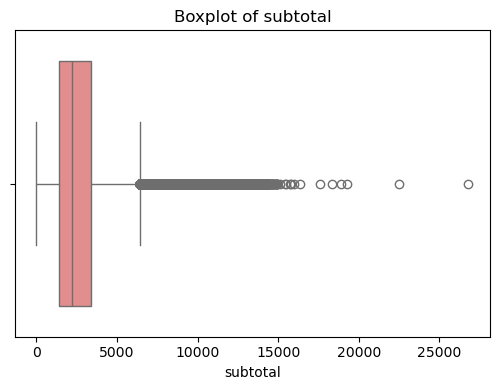

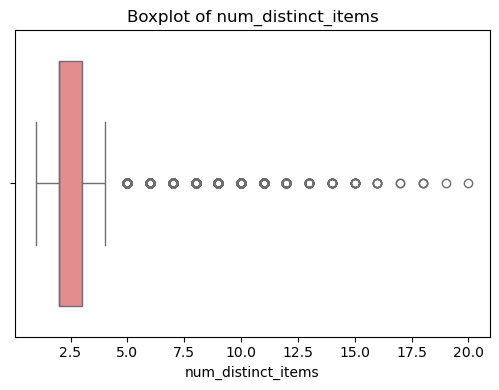

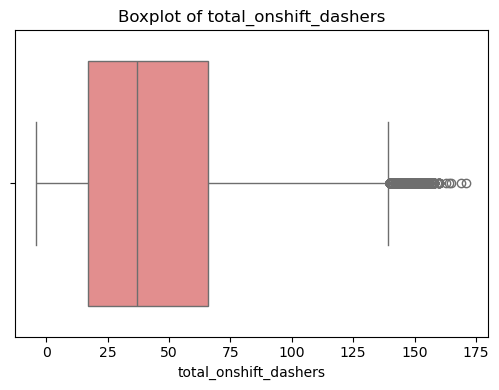

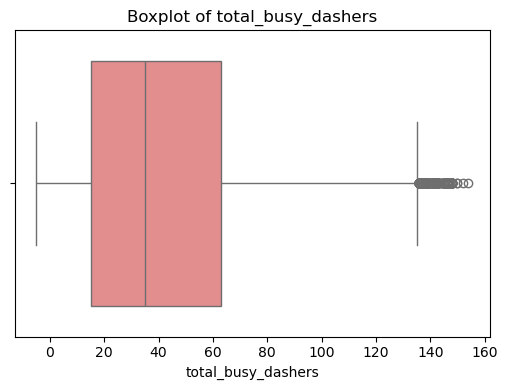

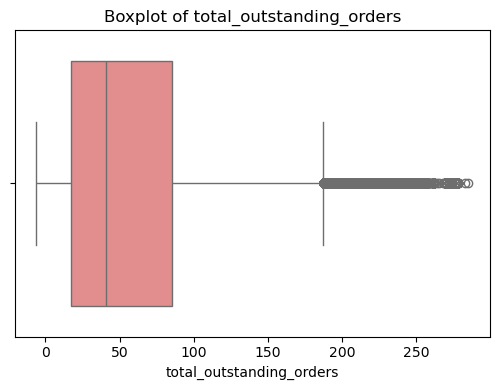

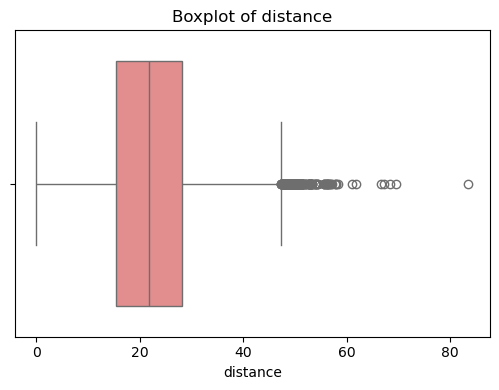

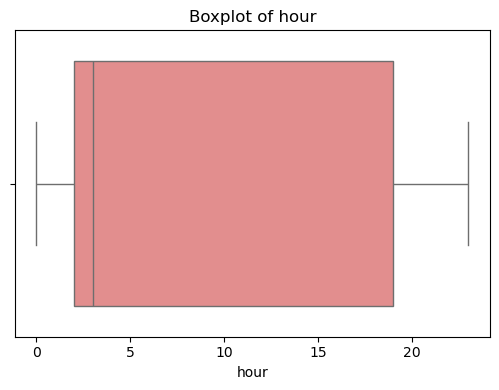

In [224]:
# Boxplot for time_taken
numericals = X_train.select_dtypes(include=['int64','int32','float64']).columns.to_list()
categories = X_train.select_dtypes(include=['category','object']).columns.to_list()

for column in numericals:
    plt.figure(figsize=(10, 4))
    
    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=X_train[column], color='lightcoral')
    plt.title(f'Boxplot of {column}')
    
    plt.tight_layout()
    plt.show()



In [225]:
print(y_train.dtypes)

float64


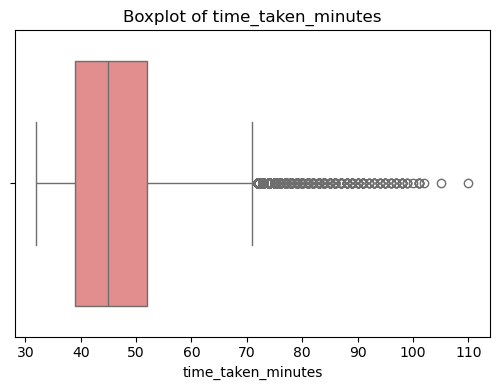

In [228]:
plt.figure(figsize=(10, 4))
    
    # Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(x=y_train, color='lightcoral')
plt.title('Boxplot of time_taken_minutes')
    
plt.tight_layout()
plt.show()

##### **3.4.2** <font color = red>[3 marks]</font> <br>
Handle outliers present in all columns

In [229]:
numericals,categories

(['total_items',
  'subtotal',
  'num_distinct_items',
  'total_onshift_dashers',
  'total_busy_dashers',
  'total_outstanding_orders',
  'distance',
  'hour'],
 ['market_id', 'order_protocol', 'isWeekend'])

In [230]:
df_train.drop(['created_at','actual_delivery_time', 'time_taken'],inplace = True, axis = 1)
df_test.drop(['created_at','actual_delivery_time', 'time_taken'],inplace = True, axis = 1)


In [231]:
# Handle outliers
for var in numericals:
    Q1_Train = df_train[var].quantile(0.25)
    Q3_Train = df_train[var].quantile(0.75)
    Q1_Test = df_test[var].quantile(0.25)
    Q3_Test = df_test[var].quantile(0.75)
    IQR_Train = Q3_Train - Q1_Train
    IQR_Test = Q3_Test - Q1_Test

    # Define lower and upper bounds for outliers
    lower_bound_train = Q1_Train - 1.5 * IQR_Train
    upper_bound_train = Q3_Train + 1.5 * IQR_Train
    # Cap the outliers
    df_train[var] = np.clip(df_train[var], lower_bound_train, upper_bound_train)

    lower_bound_test = Q1_Test - 1.5 * IQR_Test
    upper_bound_test = Q3_Test + 1.5 * IQR_Test
    # Cap the outliers
    df_test[var] = np.clip(df_test[var], lower_bound_test, upper_bound_test)

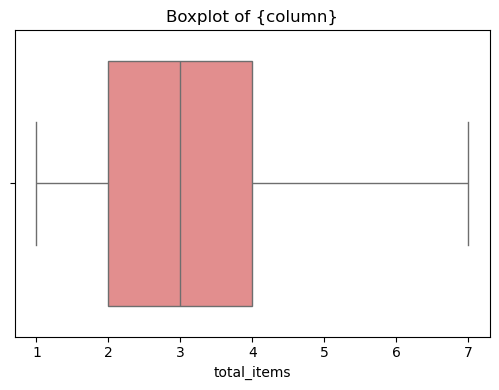

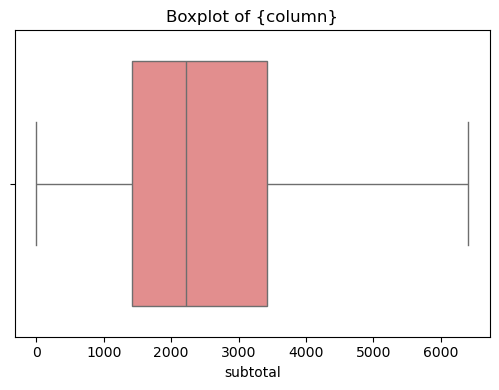

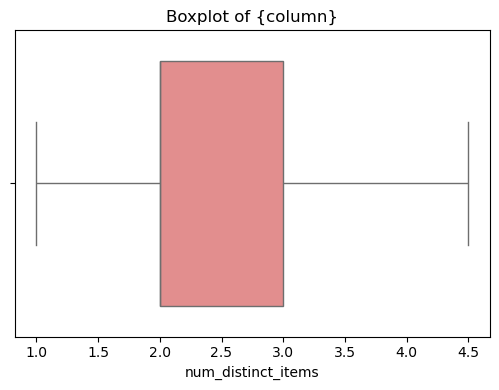

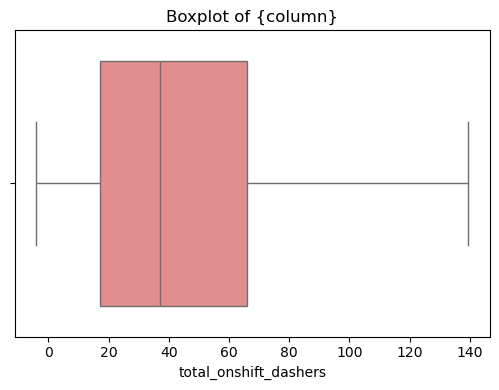

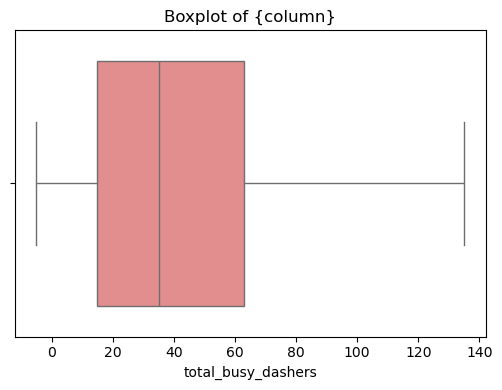

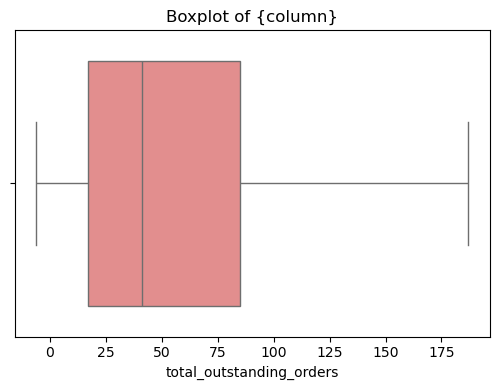

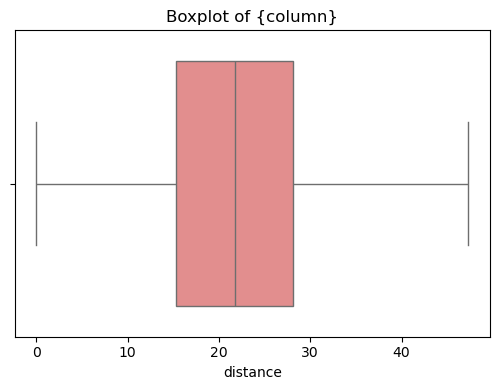

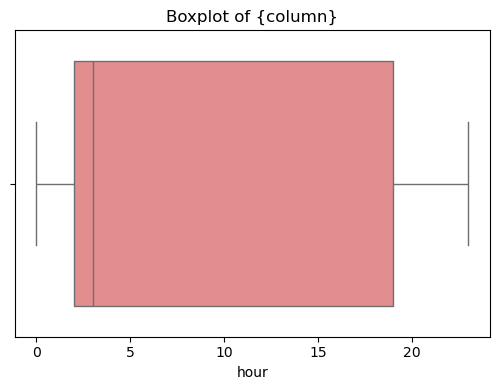

In [233]:
for column in numericals:
    plt.figure(figsize=(10, 4))
    
    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df_train[column], color='lightcoral')
    plt.title('Boxplot of {column}')
    
    plt.tight_layout()
    plt.show()

## **4. Exploratory Data Analysis on Validation Data** <font color = red>[optional]</font> <br>
Optionally, perform EDA on test data to see if the distribution match with the training data

In [ ]:
# Define numerical and categorical columns for easy EDA and data manipulation



#### **4.1 Feature Distributions**


##### **4.1.1**
Plot distributions for numerical columns in the validation set to understand their spread and any skewness

In [ ]:
# Plot distributions for all numerical columns



##### **4.1.2**
Check the distribution of categorical features

In [ ]:
# Distribution of categorical columns



##### **4.1.3**
Visualise the distribution of the target variable to understand its spread and any skewness

In [ ]:
# Distribution of time_taken



#### **4.2 Relationships Between Features**
Scatter plots for numerical features to observe how they relate to each other, especially to `time_taken`

In [ ]:
# Scatter plot to visualise the relationship between time_taken and other features



#### **4.3** Drop the columns with weak correlations with the target variable

In [ ]:
# Drop the weakly correlated columns from training dataset



## **5. Model Building** <font color = red>[15 marks]</font> <br>

#### **Import Necessary Libraries**

In [305]:
# Import libraries

Train_X = df_train.drop(columns =['time_taken_minutes'])
Train_y = df_train['time_taken_minutes']

Test_X = df_test.drop(columns =['time_taken_minutes'])
Test_y = df_test['time_taken_minutes']

In [306]:
Train_X.shape,Train_y.shape

((140621, 11), (140621,))

In [307]:
Train_X.head()

market_id order_protocol  total_items  subtotal  num_distinct_items  \
102712       2.0            2.0            1     820.0                 1.0   
94576        4.0            3.0            1     995.0                 1.0   
49784        1.0            3.0            4    2040.0                 4.0   
37753        3.0            1.0            2    2376.0                 2.0   
91728        2.0            1.0            1    1430.0                 1.0   

        total_onshift_dashers  total_busy_dashers  total_outstanding_orders  \
102712                   35.0                39.0                      56.0   
94576                   110.0                72.0                     116.0   
49784                     6.0                 3.0                       7.0   
37753                    16.0                17.0                      19.0   
91728                    64.0                47.0                      52.0   

        distance  hour isWeekend  
102712     30.32    21     False  
94576      31.16     2     False  
49784      18.16    21     False  
37753      33.44     3     False  
91728      31.56    21     False

#### **5.1 Feature Scaling** <font color = red>[3 marks]</font> <br>

In [308]:
# Apply scaling to the numerical columns

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
Train_X[numericals] = scaler.fit_transform(Train_X[numericals])


Train_X.head()
Train_X.shape,Train_y.shape

((140621, 11), (140621,))

Note that linear regression is agnostic to feature scaling. However, with feature scaling, we get the coefficients to be somewhat on the same scale so that it becomes easier to compare them.

#### **5.2 Build a linear regression model** <font color = red>[5 marks]</font> <br>

You can choose from the libraries *statsmodels* and *scikit-learn* to build the model.

In [310]:
X_train_lm[['market_id','order_protocol','isWeekend']] = X_train_lm[['market_id','order_protocol','isWeekend']] .astype('float')


In [309]:
# Create/Initialise the model


import statsmodels.api as sm


X_train_lm = sm.add_constant(Train_X)

In [302]:
X_train_lm.info()

<class 'pandas.core.frame.DataFrame'>
Index: 140621 entries, 102712 to 121958
Data columns (total 12 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   const                     140621 non-null  float64
 1   market_id                 140621 non-null  float64
 2   order_protocol            140621 non-null  float64
 3   total_items               140621 non-null  float64
 4   subtotal                  140621 non-null  float64
 5   num_distinct_items        140621 non-null  float64
 6   total_onshift_dashers     140621 non-null  float64
 7   total_busy_dashers        140621 non-null  float64
 8   total_outstanding_orders  140621 non-null  float64
 9   distance                  140621 non-null  float64
 10  hour                      140621 non-null  float64
 11  isWeekend                 140621 non-null  float64
dtypes: float64(12)
memory usage: 13.9 MB


In [311]:
lr1 = sm.OLS(Train_y, X_train_lm).fit()
lr1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     time_taken_minutes   R-squared:                       0.860
Model:                            OLS   Adj. R-squared:                  0.860
Method:                 Least Squares   F-statistic:                 7.873e+04
Date:                Tue, 25 Mar 2025   Prob (F-statistic):               0.00
Time:                        19:40:28   Log-Likelihood:            -3.7503e+05
No. Observations:              140621   AIC:                         7.501e+05
Df Residuals:                  140609   BIC:                         7.502e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       37.7465      0.044    861.031      0.000      37.661      37.832
market_id                   -0.6613      0.007    -94.362      0.000      -0.675      -0.648
order_protocol              -0.7012      0.006   -112.003      0.000      -0.713      -0.689
total_items                  0.3458      0.070      4.975      0.000       0.210       0.482
subtotal                    10.9248      0.054    200.854      0.000      10.818      11.031
num_distinct_items           1.0116      0.058     17.502      0.000       0.898       1.125
total_onshift_dashers      -54.0063      0.136   -395.655      0.000     -54.274     -53.739
total_busy_dashers         -19.5174      0.137   -142.735      0.000     -19.785     -19.249
total_outstanding_orders    70.8790      0.115    615.055      0.000      70.653      71.105
distance                    22.5291      0.050    446.515      0.000      22.430      22.628
hour                        -5.5054      0.027   -202.790      0.000      -5.559      -5.452
isWeekend                    1.5293      0.020     77.474      0.000       1.491       1.568
==============================================================================
Omnibus:                    47619.657   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           210953.688
Skew:                           1.614   Prob(JB):                         0.00
Kurtosis:                       8.059   Cond. No.                         81.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [313]:
Train_X[['market_id','order_protocol','isWeekend']] = Train_X[['market_id','order_protocol','isWeekend']] .astype('float')
lr1 = sm.OLS(Train_y, X_train_lm).fit()
lr1.summary()
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = Train_X.columns
vif['VIF'] = [variance_inflation_factor(Train_X.values, i) for i in range(Train_X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

#'market_id', 'order_protocol', 'num_distinct_items',
  #     'total_onshift_dashers', 'total_outstanding_orders', 'distance', 'hour',
  #     'isWeekend'

Features    VIF
5      total_onshift_dashers  37.27
6         total_busy_dashers  35.48
7   total_outstanding_orders  27.18
4         num_distinct_items  11.54
2                total_items  11.07
3                   subtotal   7.00
8                   distance   5.44
0                  market_id   4.38
1             order_protocol   4.15
9                       hour   2.05
10                 isWeekend   1.55

In [314]:
Train_X.drop(columns = ['total_busy_dashers'],inplace=True,axis=1)
X_train_lm = sm.add_constant(Train_X)
lr2 = sm.OLS(Train_y, X_train_lm).fit()
lr2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     time_taken_minutes   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                 7.387e+04
Date:                Tue, 25 Mar 2025   Prob (F-statistic):               0.00
Time:                        19:44:12   Log-Likelihood:            -3.8454e+05
No. Observations:              140621   AIC:                         7.691e+05
Df Residuals:                  140610   BIC:                         7.692e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       37.2405      0.047    796.529      0.000      37.149      37.332
market_id                   -0.6400      0.007    -85.363      0.000      -0.655      -0.625
order_protocol              -0.7355      0.007   -109.879      0.000      -0.749      -0.722
total_items                  0.4120      0.074      5.540      0.000       0.266       0.558
subtotal                    10.8511      0.058    186.459      0.000      10.737      10.965
num_distinct_items           1.0352      0.062     16.738      0.000       0.914       1.156
total_onshift_dashers      -64.4869      0.123   -523.773      0.000     -64.728     -64.246
total_outstanding_orders    63.9159      0.112    572.145      0.000      63.697      64.135
distance                    22.4645      0.054    416.127      0.000      22.359      22.570
hour                        -5.6261      0.029   -193.773      0.000      -5.683      -5.569
isWeekend                    1.3811      0.021     65.479      0.000       1.340       1.422
==============================================================================
Omnibus:                    38259.276   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           139997.603
Skew:                           1.338   Prob(JB):                         0.00
Kurtosis:                       7.091   Cond. No.                         73.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [315]:
vif = pd.DataFrame()
vif['Features'] = Train_X.columns
vif['VIF'] = [variance_inflation_factor(Train_X.values, i) for i in range(Train_X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
5     total_onshift_dashers  26.11
6  total_outstanding_orders  22.40
4        num_distinct_items  11.54
2               total_items  11.06
3                  subtotal   7.00
7                  distance   5.42
0                 market_id   4.38
1            order_protocol   4.12
8                      hour   2.04
9                 isWeekend   1.54

In [316]:
Train_X.drop(columns = ['total_items'],inplace=True,axis=1)

In [317]:
X_train_lm = sm.add_constant(Train_X)
lr3 = sm.OLS(Train_y, X_train_lm).fit()
lr3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     time_taken_minutes   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                 8.205e+04
Date:                Tue, 25 Mar 2025   Prob (F-statistic):               0.00
Time:                        19:46:21   Log-Likelihood:            -3.8456e+05
No. Observations:              140621   AIC:                         7.691e+05
Df Residuals:                  140611   BIC:                         7.692e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       37.2220      0.047    798.086      0.000      37.131      37.313
market_id                   -0.6401      0.007    -85.366      0.000      -0.655      -0.625
order_protocol              -0.7334      0.007   -109.730      0.000      -0.747      -0.720
subtotal                    10.9449      0.056    196.555      0.000      10.836      11.054
num_distinct_items           1.3047      0.038     34.164      0.000       1.230       1.380
total_onshift_dashers      -64.4946      0.123   -523.813      0.000     -64.736     -64.253
total_outstanding_orders    63.9140      0.112    572.070      0.000      63.695      64.133
distance                    22.4608      0.054    416.046      0.000      22.355      22.567
hour                        -5.6171      0.029   -193.745      0.000      -5.674      -5.560
isWeekend                    1.3793      0.021     65.396      0.000       1.338       1.421
==============================================================================
Omnibus:                    38303.301   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           140177.753
Skew:                           1.339   Prob(JB):                         0.00
Kurtosis:                       7.093   Cond. No.                         73.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [318]:
vif = pd.DataFrame()
vif['Features'] = Train_X.columns
vif['VIF'] = [variance_inflation_factor(Train_X.values, i) for i in range(Train_X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
4     total_onshift_dashers  26.09
5  total_outstanding_orders  22.40
2                  subtotal   6.44
6                  distance   5.41
3        num_distinct_items   4.42
0                 market_id   4.37
1            order_protocol   4.12
7                      hour   2.04
8                 isWeekend   1.54

In [319]:
Train_X.drop(columns = ['subtotal'],inplace=True,axis=1)

In [320]:
X_train_lm = sm.add_constant(Train_X)
lr4 = sm.OLS(Train_y, X_train_lm).fit()
lr4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     time_taken_minutes   R-squared:                       0.796
Model:                            OLS   Adj. R-squared:                  0.796
Method:                 Least Squares   F-statistic:                 6.863e+04
Date:                Tue, 25 Mar 2025   Prob (F-statistic):               0.00
Time:                        19:47:31   Log-Likelihood:            -4.0162e+05
No. Observations:              140621   AIC:                         8.033e+05
Df Residuals:                  140612   BIC:                         8.034e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       39.8114      0.051    788.136      0.000      39.712      39.910
market_id                   -0.6739      0.008    -79.631      0.000      -0.691      -0.657
order_protocol              -0.8198      0.008   -108.869      0.000      -0.835      -0.805
num_distinct_items           6.0915      0.033    183.394      0.000       6.026       6.157
total_onshift_dashers      -64.1327      0.139   -461.391      0.000     -64.405     -63.860
total_outstanding_orders    64.3181      0.126    509.974      0.000      64.071      64.565
distance                    22.7481      0.061    373.343      0.000      22.629      22.868
hour                        -6.3335      0.032   -195.033      0.000      -6.397      -6.270
isWeekend                    1.4887      0.024     62.535      0.000       1.442       1.535
==============================================================================
Omnibus:                    28754.407   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            76838.482
Skew:                           1.105   Prob(JB):                         0.00
Kurtosis:                       5.869   Cond. No.                         73.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [321]:
vif = pd.DataFrame()
vif['Features'] = Train_X.columns
vif['VIF'] = [variance_inflation_factor(Train_X.values, i) for i in range(Train_X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
3     total_onshift_dashers  26.01
4  total_outstanding_orders  22.40
5                  distance   5.18
0                 market_id   4.32
1            order_protocol   4.11
2        num_distinct_items   2.41
6                      hour   2.04
7                 isWeekend   1.53

In [287]:
X_test_m4=sm.add_constant(Test_X)

In [289]:
X_test_m4.drop(columns = ['subtotal','total_items','total_busy_dashers'],inplace=True,axis=1)

In [290]:
y_pred_4=lr4.predict(X_test_m4)

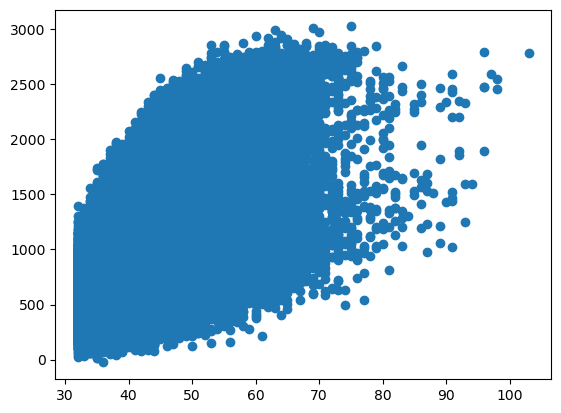

In [165]:
fig = plt.figure()
plt.scatter(Test_y,y_pred_4)


In [291]:
lr4.params

const                       39.811432
market_id                   -0.673945
order_protocol              -0.819778
num_distinct_items           6.091482
total_onshift_dashers      -64.132730
total_outstanding_orders    64.318132
distance                    22.748081
hour                        -6.333506
isWeekend                    1.488667
dtype: float64

Note that we have 12 (depending on how you select features) training features. However, not all of them would be useful. Let's say we want to take the most relevant 8 features.

We will use Recursive Feature Elimination (RFE) here.

For this, you can look at the coefficients / p-values of features from the model summary and perform feature elimination, or you can use the RFE module provided with *scikit-learn*.

#### **5.3 Build the model and fit RFE to select the most important features** <font color = red>[7 marks]</font> <br>

For RFE, we will start with all features and use
the RFE method to recursively reduce the number of features one-by-one.

After analysing the results of these iterations, we select the one that has a good balance between performance and number of features.

In [171]:
df_train.columns

Index(['market_id', 'store_primary_category', 'order_protocol', 'total_items',
       'subtotal', 'num_distinct_items', 'total_onshift_dashers',
       'total_busy_dashers', 'total_outstanding_orders', 'distance', 'hour',
       'week', 'isWeekend', 'time_taken_minutes'],
      dtype='object')

In [292]:
# Loop through the number of features and test the model
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# 1️⃣ Split Data into Train and Test Sets
# 2️⃣ Initialize and Fit RFE
model = LinearRegression()
rfe = RFE(estimator=model, n_features_to_select=8)  # Select top 5 features
rfe.fit(X_train, y_train)

# 3️⃣ Transform Test Data (Keep Only Selected Features)
X_train_rfe = X_train.loc[:, rfe.support_]  # Keep only selected features
X_test_rfe = X_test.loc[:, rfe.support_] 

# 4️⃣ Train Model on Selected Features
model.fit(X_train_rfe, y_train)

# 5️⃣ Predict Test Values
y_pred = model.predict(X_test_rfe)

# 6️⃣ Evaluate the Model
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R² Score:", r2)



Mean Squared Error: 15.83574612783916
R² Score: 0.8190764594732408


In [293]:
# Build the final model with selected number of features
print(X_train_rfe.columns)


Index(['market_id', 'order_protocol', 'num_distinct_items',
       'total_onshift_dashers', 'total_outstanding_orders', 'distance', 'hour',
       'isWeekend'],
      dtype='object')


C:\Users\ravit\AppData\Local\Temp\ipykernel_8036\2331923448.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_train-y_train_time),bins=20)


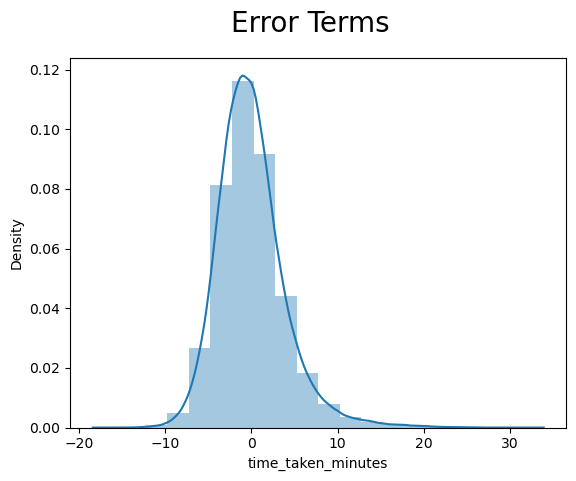

In [294]:
y_train_time = model.predict(X_train_rfe)
fig=plt.figure()
sns.distplot((y_train-y_train_time),bins=20)
fig.suptitle('Error Terms', fontsize=20)
plt.xlabel=('Errors')


## **6. Results and Inference** <font color = red>[5 marks]</font> <br>

#### **6.1 Perform Residual Analysis** <font color = red>[3 marks]</font> <br>

C:\Users\ravit\AppData\Local\Temp\ipykernel_8036\976393086.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((Train_y-y_train_time),bins=20)


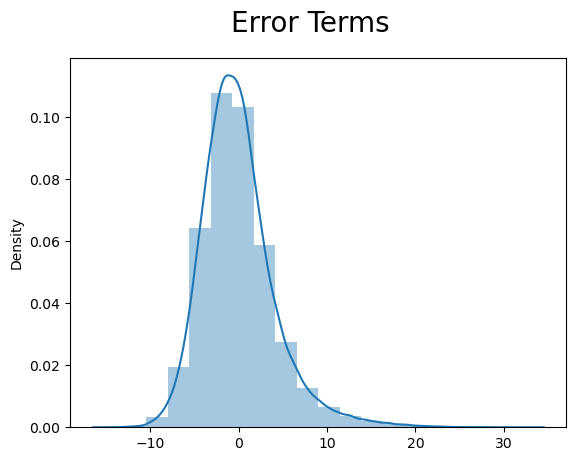

In [295]:
# Perform residual analysis using plots like residuals vs predicted values, Q-Q plot and residual histogram
y_train_time = lr4.predict(X_train_lm)
fig=plt.figure()
sns.distplot((Train_y-y_train_time),bins=20)
fig.suptitle('Error Terms', fontsize=20)
plt.xlabel=('Errors')


[Your inferences here:]



#### **6.2 Perform Coefficient Analysis** <font color = red>[2 marks]</font> <br>

Perform coefficient analysis to find how changes in features affect the target.
Also, the features were scaled, so interpret the scaled and unscaled coefficients to understand the impact of feature changes on delivery time.


In [322]:
# Compare the scaled vs unscaled features used in the final model
lr4.params


const                       39.811432
market_id                   -0.673945
order_protocol              -0.819778
num_distinct_items           6.091482
total_onshift_dashers      -64.132730
total_outstanding_orders    64.318132
distance                    22.748081
hour                        -6.333506
isWeekend                    1.488667
dtype: float64

Additionally, we can analyse the effect of a unit change in a feature. In other words, because we have scaled the features, a unit change in the features will not translate directly to the model. Use scaled and unscaled coefficients to find how will a unit change in a feature affect the target.

In [170]:
# Analyze the effect of a unit change in a feature, say 'total_items'

df['total_items'].max()

411

Note:
The coefficients on the original scale might differ greatly in magnitude from the scaled coefficients, but they both describe the same relationships between variables.

Interpretation is key: Focus on the direction and magnitude of the coefficients on the original scale to understand the impact of each variable on the response variable in the original units.

Include conclusions in your report document.

## Subjective Questions <font color = red>[20 marks]</font>

Answer the following questions only in the notebook. Include the visualisations/methodologies/insights/outcomes from all the above steps in your report.

#### Subjective Questions based on Assignment

##### **Question 1.** <font color = red>[2 marks]</font> <br>

Are there any categorical variables in the data? From your analysis of the categorical variables from the dataset, what could you infer about their effect on the dependent variable?

**Answer:**
>

Yes, there are categorical variables in data such as order_protocol, store_primary_category, market_id. market_id and order_protocol are slightly negatively correlated with the target feature.

---



##### **Question 2.** <font color = red>[1 marks]</font> <br>
What does `test_size = 0.2` refer to during splitting the data into training and test sets?

**Answer:**
test size of 0.2 means we are using 20% of data for testing and 80% of data to train the model.



---



##### **Question 3.** <font color = red>[1 marks]</font> <br>
Looking at the heatmap, which one has the highest correlation with the target variable?  

**Answer:**
>

Distance has the highest correlation with the time taken.



##### **Question 4.** <font color = red>[2 marks]</font> <br>
What was your approach to detect the outliers? How did you address them?

**Answer:**

My approach to detect outliers is using IQR. Q1 - 1.5*IQR to Q3 + 1.5 IQR is the ideal range, remaining values are assumed to be outliers here.



---



##### **Question 5.** <font color = red>[2 marks]</font> <br>
Based on the final model, which are the top 3 features significantly affecting the delivery time?

**Answer:**
>



distance, total_onshit_dashers and total_outstanding orders are top 3 significant features.



#### General Subjective Questions

##### **Question 6.** <font color = red>[3 marks]</font> <br>
Explain the linear regression algorithm in detail

**Answer:**
Linear regression algorithm is used to find the relationship between 2 variables. If multiple features are involved, we use multiple linear regression. It says that if all other variables stay constant except x1(say), then we can find how x1 and target variable y is correlated with each other. Similarly performing linear regression, we get the intercept and the coefficients of features which will predict the target variable. Based on model we can predict the target variable value for test data.



---



##### **Question 7.** <font color = red>[2 marks]</font> <br>
Explain the difference between simple linear regression and multiple linear regression

**Answer:**
>


In simple linear regression we have only 2 variables, one dependent and other independent variable where we find the relationsip between them. In multiple linear regression, we have more than 1 feature variable and one target variable to analyse, here we find the relationship between feature variables and target variable.



##### **Question 8.** <font color = red>[2 marks]</font> <br>
What is the role of the cost function in linear regression, and how is it minimized?

**Answer:**
Cost function is difference of predicted value and actual value squared. It can be minimised by finding the correct values of coefficients and intercept.



---



##### **Question 9.** <font color = red>[2 marks]</font> <br>
Explain the difference between overfitting and underfitting.



**Answer:**

>


Overfitting will happen if we have strong multi collinearity or data provided is highly populated only in certain data point ranges. Under fitting will happen if we dont have a strong relationship between target and feature variables, it will happen if the data is scattered and no speific pattern is observed.



##### **Question 10.** <font color = red>[3 marks]</font> <br>
How do residual plots help in diagnosing a linear regression model?

**Answer:**
Residual plots help in visualising the distribution of errors wrt to the actual data. So if they are normally distributes around mean, then we can say our analysis is good